# Beeld voorspellen

Inhoud:
- 1. Library importeren
- 2. Laad data
- 3. Data map voorbereiden
- 4. Dataset voorbereiden
- 5. Normalizeren
- 6. Data splitsen (Train en Test)
- 7. Modellen(CNN, ..)
- 8. Nauwkeurigheid testen

# 1. Library importeren

In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf

from matplotlib import pyplot as plt
from matplotlib.image import imread

import os
# import cv2
import shutil

In [2]:
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

Num GPUs Available:  1


In [3]:
# misschien gebruik cv2 opencv.imread

# 2. Laad data

In [4]:
# initialiseer de locatie van de beelddata
# je kan de locatie aanpassen, als deze locatie niet werkt
beeld_locatie = r'C:\Users\agusb\Desktop\beeld_data\data_gesplits_verzameld'
# Laad csv data
dt = pd.read_csv('P2_Fabric_data_csv.csv', encoding = 'ISO-8859-1')

In [5]:
# data csv bekijken
dt

,General Identifier,Category Code,Category Description,Textile Description,Structure and Construction,Composition,Mass/Weight in g/m2,Thickness,Clo Bending WEFT Contact Distance mm,Clo Bending WEFT Contact Length mm,...,Clo Shear BIAS 1 Length in mm,Clo Shear BIAS 1 Force,Clo Shear BIAS 2 Length mm,Clo Shear BIAS 2 Force,Clo Shear BIAS 3 Length mm,Clo Shear BIAS 3 Force,Clo Shear BIAS 4 Length mm,Clo Shear BIAS 4 Force,Clo Shear BIAS 5 Length mm,Clo Shear BIAS 5 Force
0,21F00013,A1,Sheer - Fragile,Silk Organza,Woven,100% SE,21 g/m2,0.110,40.666667,47.916667,...,20.0,0.010000,30.0,0.029667,40.0,0.084333,50.0,0.232000,60.0,0.881333
1,21F00015,A2,Sheer - Fragile,Silk Pong,Woven,100% SE,36 g/m2,0.080,31.000000,38.666667,...,17.0,0.010000,27.0,0.037667,37.0,0.103333,47.0,0.265000,57.0,0.816000
2,21F00012,B1,Ladies blouses,Cotton Satin-unbleached,Woven,100% CO,112 g/m2,0.220,25.750000,36.416667,...,5.5,0.010000,15.5,0.048333,25.5,0.121000,35.5,0.264000,45.5,0.644333
3,21F00018,B2,Ladies blouses,Poplin / Organic,Woven,100% CO,120 g/m2,0.009,18.250000,31.083333,...,1.0,0.010000,2.0,0.014333,3.0,0.020333,4.0,0.025333,5.0,0.032667
4,21F00035,C1,Sweaters,Winter sweat,Knit,"70% CO, 30% PES",295 g/m2,1.250,33.333333,42.833333,...,5.0,0.010000,6.0,0.013667,7.0,0.017333,8.0,0.021667,9.0,0.026333
5,21F00036,C2,Sweaters,French Terry,Knit,"95% CO, 5% EA",280 g/m2,0.810,28.333333,37.333333,...,1.0,0.010667,11.0,0.027667,21.0,0.051667,31.0,0.085667,41.0,0.118000
6,22F00001,D1,Suiting,Slightly felted wool,Woven,100% WO,279 g/m2,0.780,25.000000,35.333333,...,2.0,0.011667,12.0,0.121333,22.0,0.270000,32.0,0.491333,42.0,0.767000
7,22F00002,D2,Suiting,Wool (CK),Woven,"Wo (warp), PES, CV, EL (Weft)",198 g/m2,0.420,15.333333,29.000000,...,5.0,0.010000,15.0,0.035000,25.0,0.088333,35.0,0.150333,45.0,0.266333
8,21F00020,E1,Jeans / sportive,Heavy Twill/White denim,Woven,100% CO,381 g/m2,0.610,43.916667,50.750000,...,1.0,0.072667,2.0,0.107000,3.0,0.150333,4.0,0.190333,5.0,0.233000
9,22F00000,E2,Jeans / sportive,Raw Denim,Woven,100% CO,470 g/m2,0.930,33.333333,41.750000,...,1.0,0.012000,11.0,0.153333,21.0,0.388667,31.0,0.800333,41.0,1.303333


# 3. Data map voorbereiden

## Map creeen voor submap

In [6]:
directory = "data" # folder initializeren
try:
    os.mkdir(directory) # maak folder 'data'
except OSError as error:
    print(error) # error output

## Elk sub data is een eigenschaap id

In [7]:
# de naam iden is 
ge_id = dt["General Identifier"] # haal kolom 'General Identifier' van csv

for idx in ge_id: # loop door id's
    sub_data = os.path.join(directory, idx) # initialiseer sub folder met id als de naam
    try:
        os.mkdir(sub_data) # maak sub-folder
    except OSError as error:
        print(error) # error

## Laad beeld data 

In [39]:
beeld_data = os.listdir(beeld_locatie) # laad beeld data

## Verplaats alle beelden naar de submap

In [40]:
for idex in ge_id: #loop door id's
    images = [f for f in beeld_data if idex in f] # verzamel beelden die behoren bij elk id
    for image in images: #loop door beelden
        #create old and nieuw path
        new_path = 'data/'+ idex +'/'+ image # maak een path waar je de beelden naartoe wilt verplaatsen 
        old_path = beeld_locatie +'/'+ image # maak een path waar je de beelden wilt halen
        shutil.move(old_path, new_path) # verplaats beelden naar "new_path"   

In [1]:
# Voor Mac OS

## kijk als de data bestaat in de sub folder 

In [5]:
dt["General Identifier"][1] # kies een id

'21F00015'

In [6]:
img = imread(os.path.join('data','21F00015', '21F00015_0001_NRM.png')) # kies een beeld van die id

In [7]:
img.shape # kijk naar de shape. Het is 6570X4778 pixels voor NRM(3d beeld type)

(3583, 4927, 3)

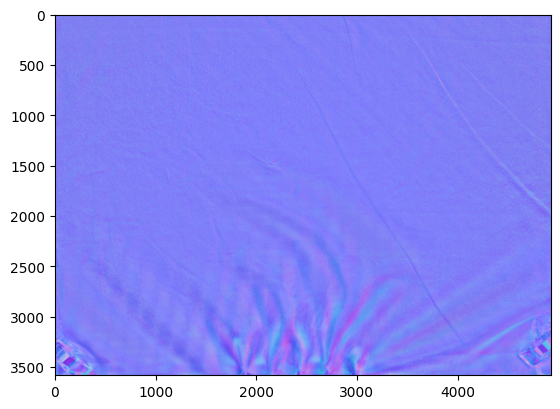

In [8]:
# plot het beeld
plt.imshow(img)
plt.show()

# 4. Dataset voorbereiden

### Preprocessing data / Data voorbewerken

In [6]:
# Als deze code runnen krijg je meer informatie van image_dataset_from_directory
# tf.keras.utils.image_dataset_from_directory??

In [8]:
data = tf.keras.utils.image_dataset_from_directory(beeld_locatie) # data genereren

Found 46250 files belonging to 3 classes.


In [31]:
# test_data = r'C:\Users\agusb\Desktop\beeld_data\test'

In [32]:
# test_data = tf.keras.utils.image_dataset_from_directory(test_data)

Found 4 files belonging to 2 classes.


In [9]:
class_names = data.class_names # labels halen en bekijken
print(class_names)

['21F00018', '21F00020', '22F00002']


In [10]:
#Peprocessing data by scaling image values to the scale between 0 and 1

# 5. Normalizeren

In [11]:
# normalizeren
data = data.map(lambda x, y: (x/255, y)) # de beeldwaarden downscalen naar tussen 0 en 1

In [12]:
# data is automatisch geshuffled

In [13]:
# initialiseer batch om data te bekijken/plotten
scaled_iterator = data.as_numpy_iterator()
batch = scaled_iterator.next()

In [14]:
# als het beeld donker is dan heb je de data(x) 2keer gedeeld door 255 dan moet je de data opnieuw runnen

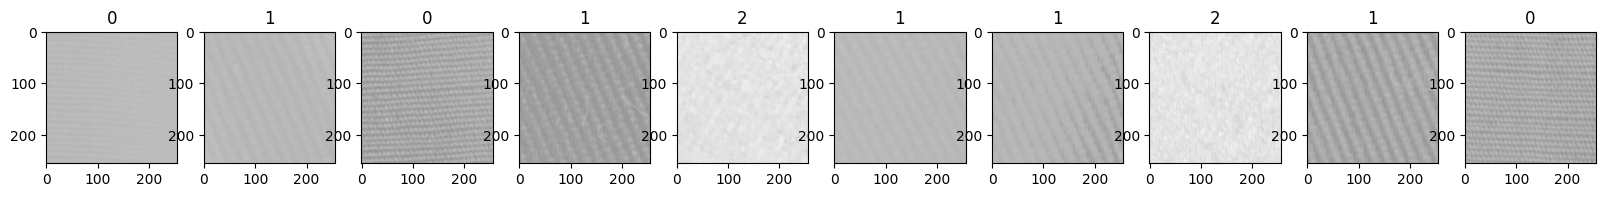

In [15]:
# data bekijken met labels
fig, ax = plt.subplots(ncols=10, figsize=(20,20))
for idx, img in enumerate(batch[0][:10]):
    ax[idx].imshow(img)
    ax[idx].title.set_text(batch[1][idx])

# 6. Data splitsen (Train en Test)

In [16]:
len(data) # lengte van de batch

1446

##### het aantal split bepalen

In [17]:
# splitsen 80% en 20%
train_size = int(len(data)*.8) # 80% om te trainen

test_size = int(len(data)*.2)+1 # 20% voor de test

In [18]:
train_size

1156

In [19]:
test_size

290

##### data splitsen

In [20]:
train = data.take(train_size) # initialiseer train

In [21]:
test = data.skip(train_size).take(test_size) # initialiseer test

In [34]:
test_data

<BatchDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [35]:
test

<TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

# 7. Modellen

### Eerste poging: CNN

In [22]:
from keras import models, layers
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, AveragePooling2D

In [60]:
# INFO: dit run je als je meer informatie wilt hebben
# AveragePooling2D??
# Dropout??

In [61]:
# cnn = models.Sequential()

# cnn.add(Conv2D(filters=16,
#                   kernel_size=(3, 3),
#                   activation='relu', 
#                   input_shape=(256,256,3)))

# cnn.add(MaxPooling2D())

# cnn.add(Conv2D(filters=32,
#                kernel_size=(3,3),
#                activation='relu'))

# cnn.add(MaxPooling2D())

# cnn.add(Flatten())
        
# cnn.add(Dense(units=128, activation='relu'))
# cnn.add(Dense(units=1, activation = 'softmax'))

In [23]:
model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(256, 256, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(32, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
# model.add(layers.Conv2D(96, (3, 3), activation='relu'))
# model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())

model.add(layers.Dense(128, activation='relu'))

model.add(Dropout(0.5))

model.add(layers.Dense(10, activation='softmax'))

In [24]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 64)       0

In [25]:
model.compile(optimizer='adam',metrics = ['accuracy'], loss = 'sparse_categorical_crossentropy')

In [26]:
history_cnn = model.fit(train, epochs = 10, validation_data = test)

Epoch 1/10
1156/1156 [==============================] - 93s 75ms/step - loss: 0.5664 - accuracy: 0.6911 - val_loss: 0.4590 - val_accuracy: 0.7314
Epoch 2/10
1156/1156 [==============================] - 135s 116ms/step - loss: 0.3977 - accuracy: 0.7895 - val_loss: 0.1406 - val_accuracy: 0.9560
Epoch 3/10
1156/1156 [==============================] - 141s 121ms/step - loss: 0.3171 - accuracy: 0.8506 - val_loss: 0.3884 - val_accuracy: 0.7391
Epoch 4/10
1156/1156 [==============================] - 99s 86ms/step - loss: 0.1800 - accuracy: 0.9360 - val_loss: 0.0479 - val_accuracy: 0.9881
Epoch 5/10
1156/1156 [==============================] - 98s 85ms/step - loss: 0.1398 - accuracy: 0.9510 - val_loss: 0.0497 - val_accuracy: 0.9810
Epoch 6/10
1156/1156 [==============================] - 115s 99ms/step - loss: 0.0316 - accuracy: 0.9914 - val_loss: 0.0149 - val_accuracy: 0.9945
Epoch 7/10
1156/1156 [==============================] - 107s 92ms/step - loss: 0.0888 - accuracy: 0.9654 - val_loss: 0.

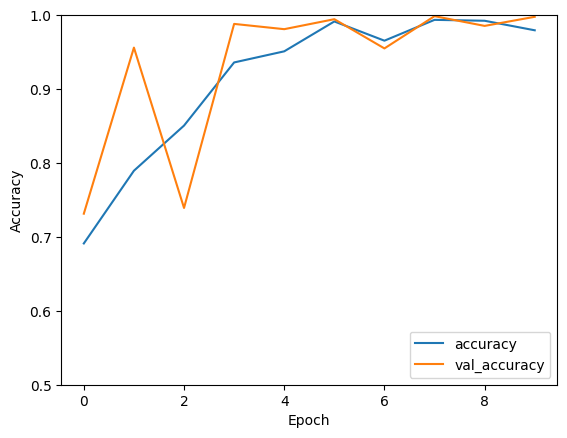

In [28]:
plt.plot(history_cnn.history['accuracy'], label='accuracy')
plt.plot(history_cnn.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

In [38]:
predicted_classes = model.evaluate(test)
predicted_classes

290/290 [==============================] - 24s 25ms/step - loss: 0.0073 - accuracy: 0.9977


[0.007286449428647757, 0.9977316856384277]

### tweede model : ... 

### derde model : ... 

TODO's:
Graph/statistic maken